#<font color=FF0000>Intro</font>


Como escolher o teste:

1.   Qual o tipo de teste? (Comparação, Correlação, ...)
2.   Os dados são Quantitativos ou Qualitativos?
3.   Quantas amostras(samples)?
4.   Quantos grupos?
5.   Possuem distribuição normal (paramétrica)?
5.   Osdados estão pareados?



Hipótese nula (H0): é a hipótese assumida como verdadeira para a construção do teste. É a teoria, o efeito ou a alternativa que se está interessado em testar.<br>
Hipótese alternativa (H1): é considerada quando a hipótese nula não tem evidência estatística.<br>
Rejeitar a hipótese nula, se e somente se o p–valor for menor que o nível de significância pré–estabelecido. Usualmente é usado o valor de 0,05, ou seja, 5%.

#<font color=FF0000>Compare Means/Median Difference

**Z-test ou T-test?**<br>

**Na prática todos usam T-test!**<br>

O Z-test é mais preciso quando a variância é conhecida e a amostra é grande. Grande (n > 30)<br>

O T-test é mais conservador para amostras pequenas e sem variância conhecida, já que as caudas da distribuição T consideram a incerteza adicional. Pequena (n ≤ 30)
<br>
Se estiver em dúvida e tiver uma amostra pequena com variância desconhecida, é mais seguro usar o T-test. Para amostras grandes ou quando a variância for conhecida, o Z-test é preferido.

## 1-sample Z-test for mean <br>

In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ztest

# Dados da amostra
sample = [55, 50, 45, 60, 65, 58, 54, 52]
media_amostral = np.mean(sample)

# Parâmetros da população
population_mean = 50

# Realizando o Z-test
z_stat, p_value = ztest(sample, value=population_mean)
print(f"Média amostral: {media_amostral}")
print("Z-statistic:", z_stat)
print("P-value:", p_value)


Média amostral: 54.875
Z-statistic: 2.2248125302998183
P-value: 0.026093825869679392


In [ ]:
from statsmodels.stats.weightstats import ztest

# Dados
amostra = [5.2, 5.5, 5.8, 6.0, 5.4, 5.6]  # Dados da amostra
media_amostral = np.mean(amostra)
media_populacao = 5  # Média populacional

# Teste Z
print(f"Média amostral: {media_amostral}")
z_stat, p_val = ztest(amostra, value=media_populacao)
print(f"Z-Statistic: {z_stat}, p-value: {p_val}")


Média amostral: 5.583333333333333
Z-Statistic: 5.0, p-value: 5.733031437583866e-07


## 1-sample T-test for mean

In [ ]:
from scipy.stats import ttest_1samp

# Dados
amostra = [5.2, 5.5, 5.8, 6.0, 5.4, 5.6]
media_populacao = 5.0

# Teste T
t_stat, p_val = ttest_1samp(amostra, popmean=media_populacao)
print(f"T-Statistic: {t_stat}, p-value: {p_val}")


T-Statistic: 5.0, p-value: 0.0041047159800533225


In [ ]:
from scipy.stats import ttest_1samp

# Dados da amostra
sample = [55, 50, 45, 60, 65, 58, 54, 52]

# Parâmetros da população
population_mean = 50

# Realizando o T-test
t_stat, p_value = ttest_1samp(sample, population_mean)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 2.2248125302998183
P-value: 0.06143936891033543


##1-sample Z-test for proportion <br>


In [ ]:
import statsmodels.stats.proportion as smp

# Dados
sucessos = 45  # Número de sucessos na amostra
n = 100  # Tamanho da amostra
proporcao_populacional = 0.5  # Proporção populacional

# Teste Z para proporções
z_stat, p_val = smp.proportions_ztest(sucessos, n, proporcao_populacional)
print(f"Z-Statistic: {z_stat}, p-value: {p_val}")


Z-Statistic: -1.0050378152592119, p-value: 0.31487864133641996


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Dados da amostra
successes = 40  # Número de sucessos
n = 100         # Tamanho da amostra
population_proportion = 0.35

# Realizando o Z-test
z_stat, p_value = proportions_ztest(successes, n, value=population_proportion)

print("Z-statistic:", z_stat)
print("P-value:", p_value)


Z-statistic: 1.0206207261596585
P-value: 0.3074341659273949


## 1-sample T-test for proportion

In [ ]:
from scipy.stats import ttest_1samp

# Dados
amostra = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1]  # Dados binários (1=sucesso, 0=falha)
proporcao_populacional = 0.5

# Convertendo proporções
media_amostra = sum(amostra) / len(amostra)

# Teste T
t_stat, p_val = ttest_1samp(amostra, popmean=proporcao_populacional)
print(f"T-Statistic: {t_stat}, p-value: {p_val}")


T-Statistic: 1.309307341415954, p-value: 0.2228683501335202


##2-sample Independent T-test (unpaired)


In [ ]:
from scipy.stats import ttest_ind

# Dados de duas amostras independentes
altura_homens = [175, 180, 178, 185, 172]
altura_mulheres = [165, 160, 162, 170, 168]

# Teste T para amostras independentes
t_stat, p_val = ttest_ind(altura_homens, altura_mulheres, equal_var=True)  # equal_var=True assume variâncias iguais
print(f"T-Statistic: {t_stat}, p-value: {p_val}")

# Verificação
if p_val < 0.05:
    print("Rejeitamos a hipótese nula: as médias dos dois grupos são diferentes.")
else:
    print("Falhamos em rejeitar a hipótese nula: não há diferença significativa entre as médias.")


T-Statistic: 4.512365874254051, p-value: 0.0019696502912141646
Rejeitamos a hipótese nula: as médias dos dois grupos são diferentes.


##2-sample Dependent T-test (paired)

In [ ]:
from scipy.stats import ttest_rel

# Dados de peso antes e depois de um programa de exercícios
peso_antes = [85, 90, 78, 88, 92]
peso_depois = [83, 88, 76, 85, 89]

# Teste T para amostras dependentes (pareadas)
t_stat, p_val = ttest_rel(peso_antes, peso_depois)
print(f"T-Statistic: {t_stat}, p-value: {p_val}")

# Verificação
if p_val < 0.05:
    print("Rejeitamos a hipótese nula: há uma diferença significativa entre antes e depois.")
else:
    print("Falhamos em rejeitar a hipótese nula: não há diferença significativa entre antes e depois.")


T-Statistic: 9.797958971132713, p-value: 0.0006081849444633356
Rejeitamos a hipótese nula: há uma diferença significativa entre antes e depois.


##1-way ANOVA

O 1-way ANOVA (Análise de Variância unidirecional) é usado para comparar as médias de três ou mais grupos independentes para determinar se há uma diferença estatisticamente significativa entre eles.

In [ ]:
from scipy.stats import f_oneway

# Dados de três grupos independentes
metodo1 = [85, 90, 88, 92, 87]  # Alunos com método de ensino 1
metodo2 = [78, 82, 80, 75, 79]  # Alunos com método de ensino 2
metodo3 = [89, 85, 87, 90, 88]  # Alunos com método de ensino 3

# Teste ANOVA unidirecional
f_stat, p_val = f_oneway(metodo1, metodo2, metodo3)
print(f"F-Statistic: {f_stat}, p-value: {p_val}")

# Verificação
if p_val < 0.05:
    print("Rejeitamos a hipótese nula: há uma diferença significativa entre os grupos.")
else:
    print("Falhamos em rejeitar a hipótese nula: não há diferença significativa entre os grupos.")


F-Statistic: 24.50847457627118, p-value: 5.7860814322359474e-05
Rejeitamos a hipótese nula: há uma diferença significativa entre os grupos.


#<font color=FF0000>Relationship X and Y

##Correlação de Pearson (paramétrica)

In [ ]:
from scipy.stats import pearsonr

# Dados
horas_estudo = [2, 3, 4, 5, 6, 7]
notas = [20, 65, 160, 20, 500, 1100]

# Correlação de Pearson
coeficiente, p_valor = pearsonr(horas_estudo, notas)
print(f"Coeficiente de Correlação de Pearson: {coeficiente:.2f}, p-valor: {p_valor:.2e}")

# Interpretação
if p_valor < 0.05:
    print("A correlação é estatisticamente significativa.")
else:
    print("Não há correlação estatisticamente significativa.")


Coeficiente de Correlação de Pearson: 0.82, p-valor: 4.46e-02
A correlação é estatisticamente significativa.


##Correlação de Spearman (não paramétrica)


In [ ]:
from scipy.stats import spearmanr

# Dados
ranking = [1, 2, 3, 4, 5, 6]
tempo_corrida = [12.5, 15.0, 19.0, 16.5, 18.0, 20.0]

# Correlação de Spearman
coeficiente, p_valor = spearmanr(ranking, tempo_corrida)
print(f"Coeficiente de Correlação de Spearman: {coeficiente:.2f}, p-valor: {p_valor:.2e}")

# Interpretação
if p_valor < 0.05:
    print("A correlação é estatisticamente significativa.")
else:
    print("Não há correlação estatisticamente significativa.")


Coeficiente de Correlação de Spearman: 0.83, p-valor: 4.16e-02
A correlação é estatisticamente significativa.


##Regression

Coeficiente angular (beta1): 2.67
Intercepto (beta0): 14.88
Erro quadrático médio (MSE): 240.24
R² (coeficiente de determinação): 0.96


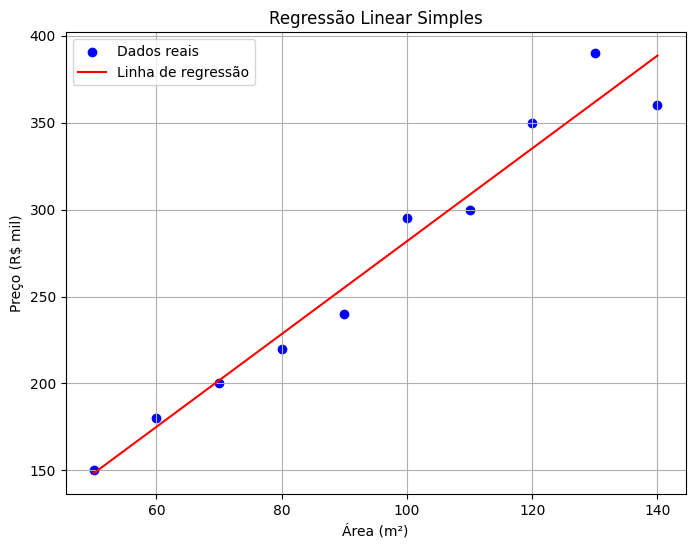

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dados fictícios: área (em m²) e preços (em R$ mil)
area = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140]).reshape(-1, 1)  # Área (variável independente)
preco = np.array([150, 180, 200, 220, 240, 295, 300, 350, 390, 360])  # Preço (variável dependente)

# Criar e ajustar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(area, preco)

# Fazer previsões
previsoes = modelo.predict(area)

# Coeficientes do modelo
coeficiente = modelo.coef_[0]
intercepto = modelo.intercept_
print(f"Coeficiente angular (beta1): {coeficiente:.2f}")
print(f"Intercepto (beta0): {intercepto:.2f}")

# Métricas de avaliação
mse = mean_squared_error(preco, previsoes)
r2 = r2_score(preco, previsoes)
print(f"Erro quadrático médio (MSE): {mse:.2f}")
print(f"R² (coeficiente de determinação): {r2:.2f}")

# Plot dos dados e da linha de regressão
plt.figure(figsize=(8, 6))
plt.scatter(area, preco, color='blue', label='Dados reais')  # Dados reais
plt.plot(area, previsoes, color='red', label='Linha de regressão')  # Linha de regressão
plt.title('Regressão Linear Simples')
plt.xlabel('Área (m²)')
plt.ylabel('Preço (R$ mil)')
plt.legend()
plt.grid(True)
plt.show()


Métricas:<br>
Erro Absoluto Médio (MAE): Dá uma ideia direta do erro médio em termos das unidades dos dados.<br>
Erro Médio Quadrático (MSE): Penaliza mais erros grandes, útil se erros maiores têm impacto maior.<br>
R²: Indica a proporção da variância explicada pelo modelo (bom para comparar modelos)<br><br>

R² é bom?<br>
Um R² acima de 0.7 geralmente indica um bom ajuste para muitos problemas, mas depende do domínio.<br>
Exemplo: Um R² de 0.5 pode ser aceitável para prever comportamento humano, mas ruim para previsões financeiras.

In [10]:
print(previsoes)
p1 = modelo.predict(np.array(55).reshape(-1, 1))
p2 = modelo.predict(np.array(1).reshape(-1, 1))
p3 = modelo.predict(np.array(200).reshape(-1, 1))
print(p1,p2,p3)

[148.36363636 175.06060606 201.75757576 228.45454545 255.15151515
 281.84848485 308.54545455 335.24242424 361.93939394 388.63636364]
[161.71212121] [17.54848485] [548.81818182]


#<font color=FF0000>Categorical

##Chi-square Test

Usar em amostras grandes

In [ ]:
from scipy.stats import chi2_contingency

# Tabela de contingência (gênero x preferência)
#              Produto A   Produto B
# Masculino      30          20
# Feminino       35          15
tabela = [[30, 20], [35, 15]]

# Teste qui-quadrado
chi2, p_valor, dof, esperado = chi2_contingency(tabela)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_valor:.2e}")
print(f"Graus de liberdade: {dof}")
print(f"Tabela esperada: \n{esperado}")

# Interpretação
if p_valor < 0.05:
    print("Rejeitamos a hipótese nula: há associação entre as variáveis.")
else:
    print("Falhamos em rejeitar a hipótese nula: não há associação significativa entre as variáveis.")


Chi-square statistic: 0.70
p-value: 4.02e-01
Graus de liberdade: 1
Tabela esperada: 
[[32.5 17.5]
 [32.5 17.5]]
Falhamos em rejeitar a hipótese nula: não há associação significativa entre as variáveis.


## Fisher’s Exact Test

Usar em amostras pequenas<br>
Só para 2x2 tables

In [ ]:
from scipy.stats import fisher_exact

# Tabela de contingência (grupo x resposta)
#              Resposta Positiva   Resposta Negativa
# Grupo 1            8                 2
# Grupo 2            1                 5
tabela = [[8, 2], [1, 5]]

# Teste exato de Fisher
odds_ratio, p_valor = fisher_exact(tabela)

print(f"Odds Ratio: {odds_ratio:.2f}")
print(f"p-value: {p_valor:.2e}")

# Interpretação
if p_valor < 0.05:
    print("Rejeitamos a hipótese nula: há associação entre as variáveis.")
else:
    print("Falhamos em rejeitar a hipótese nula: não há associação significativa entre as variáveis.")


Odds Ratio: 20.00
p-value: 3.50e-02
Rejeitamos a hipótese nula: há associação entre as variáveis.


#<font color=FF0000>Survival Analysis

##Kaplan-Meier

In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=efd2bff6e52dd69debf3ebbad60b2dbbb4741719847a060660ad9d628bf9ec4f
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


          KM_estimate
timeline             
0.0          1.000000
2.0          0.900000
3.0          0.800000
4.0          0.700000
5.0          0.583333
6.0          0.437500
8.0          0.218750
10.0         0.218750
Mediana do tempo de sobrevivência: 6.0 dias


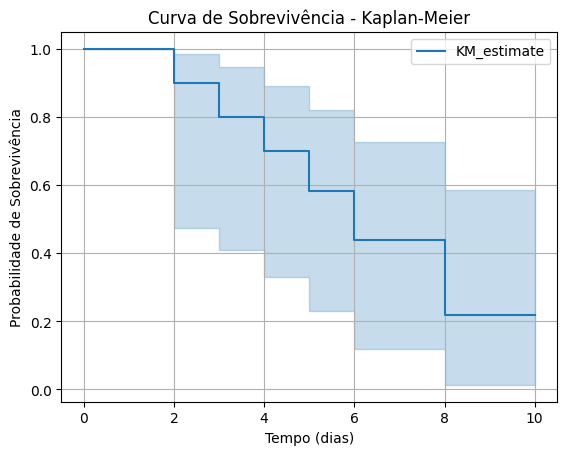

In [ ]:
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt


# Dados fictícios: tempo de sobrevivência (em dias)
# - Pacientes censurados (event_occurred=False) não atingiram o evento no estudo
tempo = [5, 6, 6, 2, 4, 4, 3, 5, 8, 10]
event_occurred = [1, 1, 0, 1, 1, 0, 1, 0, 1, 0]  # 1: Evento ocorreu (recuperação), 0: censurado


# Inicializando o estimador de Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustando o modelo aos dados
kmf.fit(durations=tempo, event_observed=event_occurred)

# Exibindo a estimativa de sobrevivência
print(kmf.survival_function_)
print(f"Mediana do tempo de sobrevivência: {kmf.median_survival_time_} dias")

# Plot da curva de sobrevivência
kmf.plot_survival_function()
plt.title("Curva de Sobrevivência - Kaplan-Meier")
plt.xlabel("Tempo (dias)")
plt.ylabel("Probabilidade de Sobrevivência")
plt.grid()
plt.show()


Cenário geral dos dados:<br><br>
Indivíduos que morreram (evento ocorreu):<br>
Indivíduos nos dias: 5, 6, 2, 4, 3, 8 (onde event_occurred é 1).<br><br>
Indivíduos censurados (não sabemos o que aconteceu depois):<br>
Indivíduos nos dias: 6, 4, 5, 10 (onde event_occurred é 0).<br>


          KM_estimate
timeline             
0.0          1.000000
1.0          0.916667
2.0          0.833333
3.0          0.750000
4.0          0.750000
5.0          0.656250
6.0          0.562500
7.0          0.450000
8.0          0.337500
9.0          0.337500
10.0         0.168750
Mediana de retenção: 7.0 meses


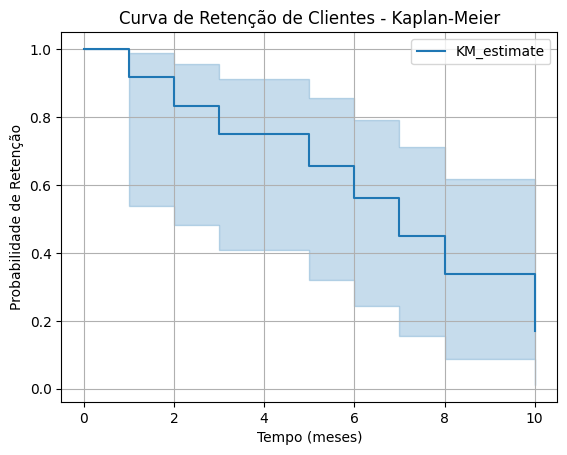

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Dados de retenção: tempo de permanência (em meses)
tempo_retenção = [1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 10]
# Indicador se o cliente saiu (1: saiu, 0: censurado)
clientes_censurados = [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0]

# Criar o estimador Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustar o modelo com os dados
kmf.fit(durations=tempo_retenção, event_observed=clientes_censurados)

# Exibir o resumo
print(kmf.survival_function_)
print(f"Mediana de retenção: {kmf.median_survival_time_} meses")

# Plot da curva de retenção
kmf.plot_survival_function()
plt.title("Curva de Retenção de Clientes - Kaplan-Meier")
plt.xlabel("Tempo (meses)")
plt.ylabel("Probabilidade de Retenção")
plt.grid()
plt.show()


#<font color=FF0000>Sensitivity/Specificity

##ROC

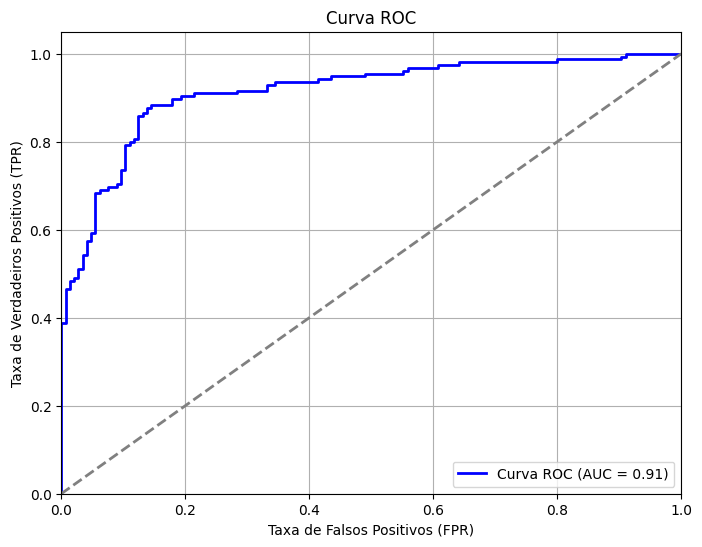

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Gerar um conjunto de dados fictício para classificação binária
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Prever as probabilidades de classe positiva (1)
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC (Área sob a curva)
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha de aleatoriedade
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Interpretação da Curva ROC:<br><br>
A linha diagonal (linha de aleatoriedade) indica um modelo que classifica aleatoriamente (sem capacidade discriminativa).<br>
A curva ROC quanto mais próxima do canto superior esquerdo, melhor o modelo (alto TPR e baixo FPR).<br><br>
AUC (Área sob a Curva):<br>
0.5: O modelo é equivalente a uma classificação aleatória.<br>
1.0: O modelo tem uma performance perfeita.<br>
Quanto mais próximo de 1.0, melhor o modelo.

#<font color=FF0000>Referências

https://www.graphpad.com/support/faqid/1790/

https://f.hubspotusercontent00.net/hubfs/4627953/graphpad-flowchart-pdf.pdf

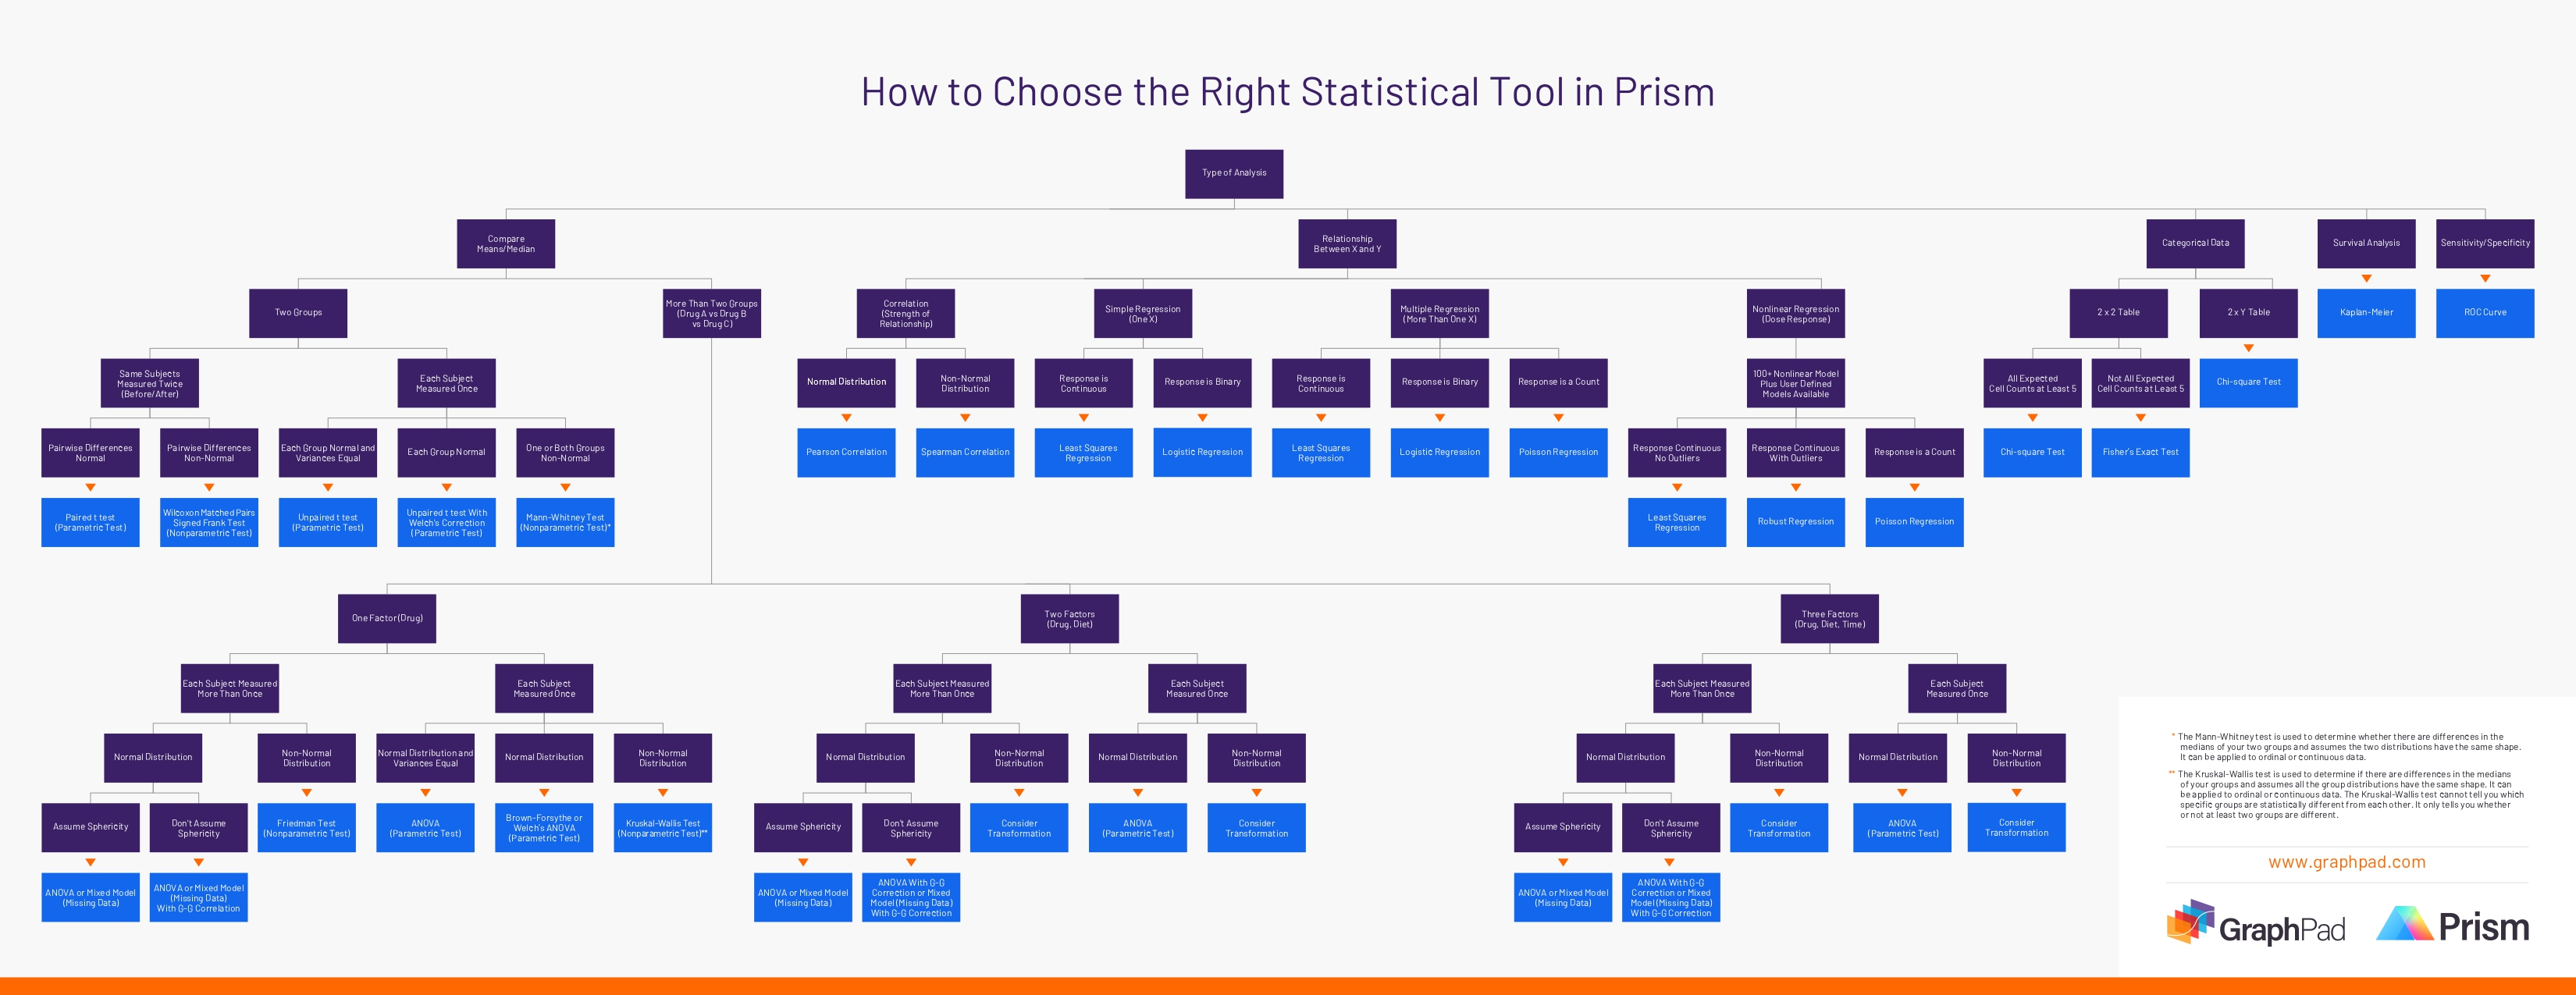

https://statsandr.com/blog/what-statistical-test-should-i-do/

https://statsandr.com/blog/files/overview-statistical-tests-statsandr.pdf

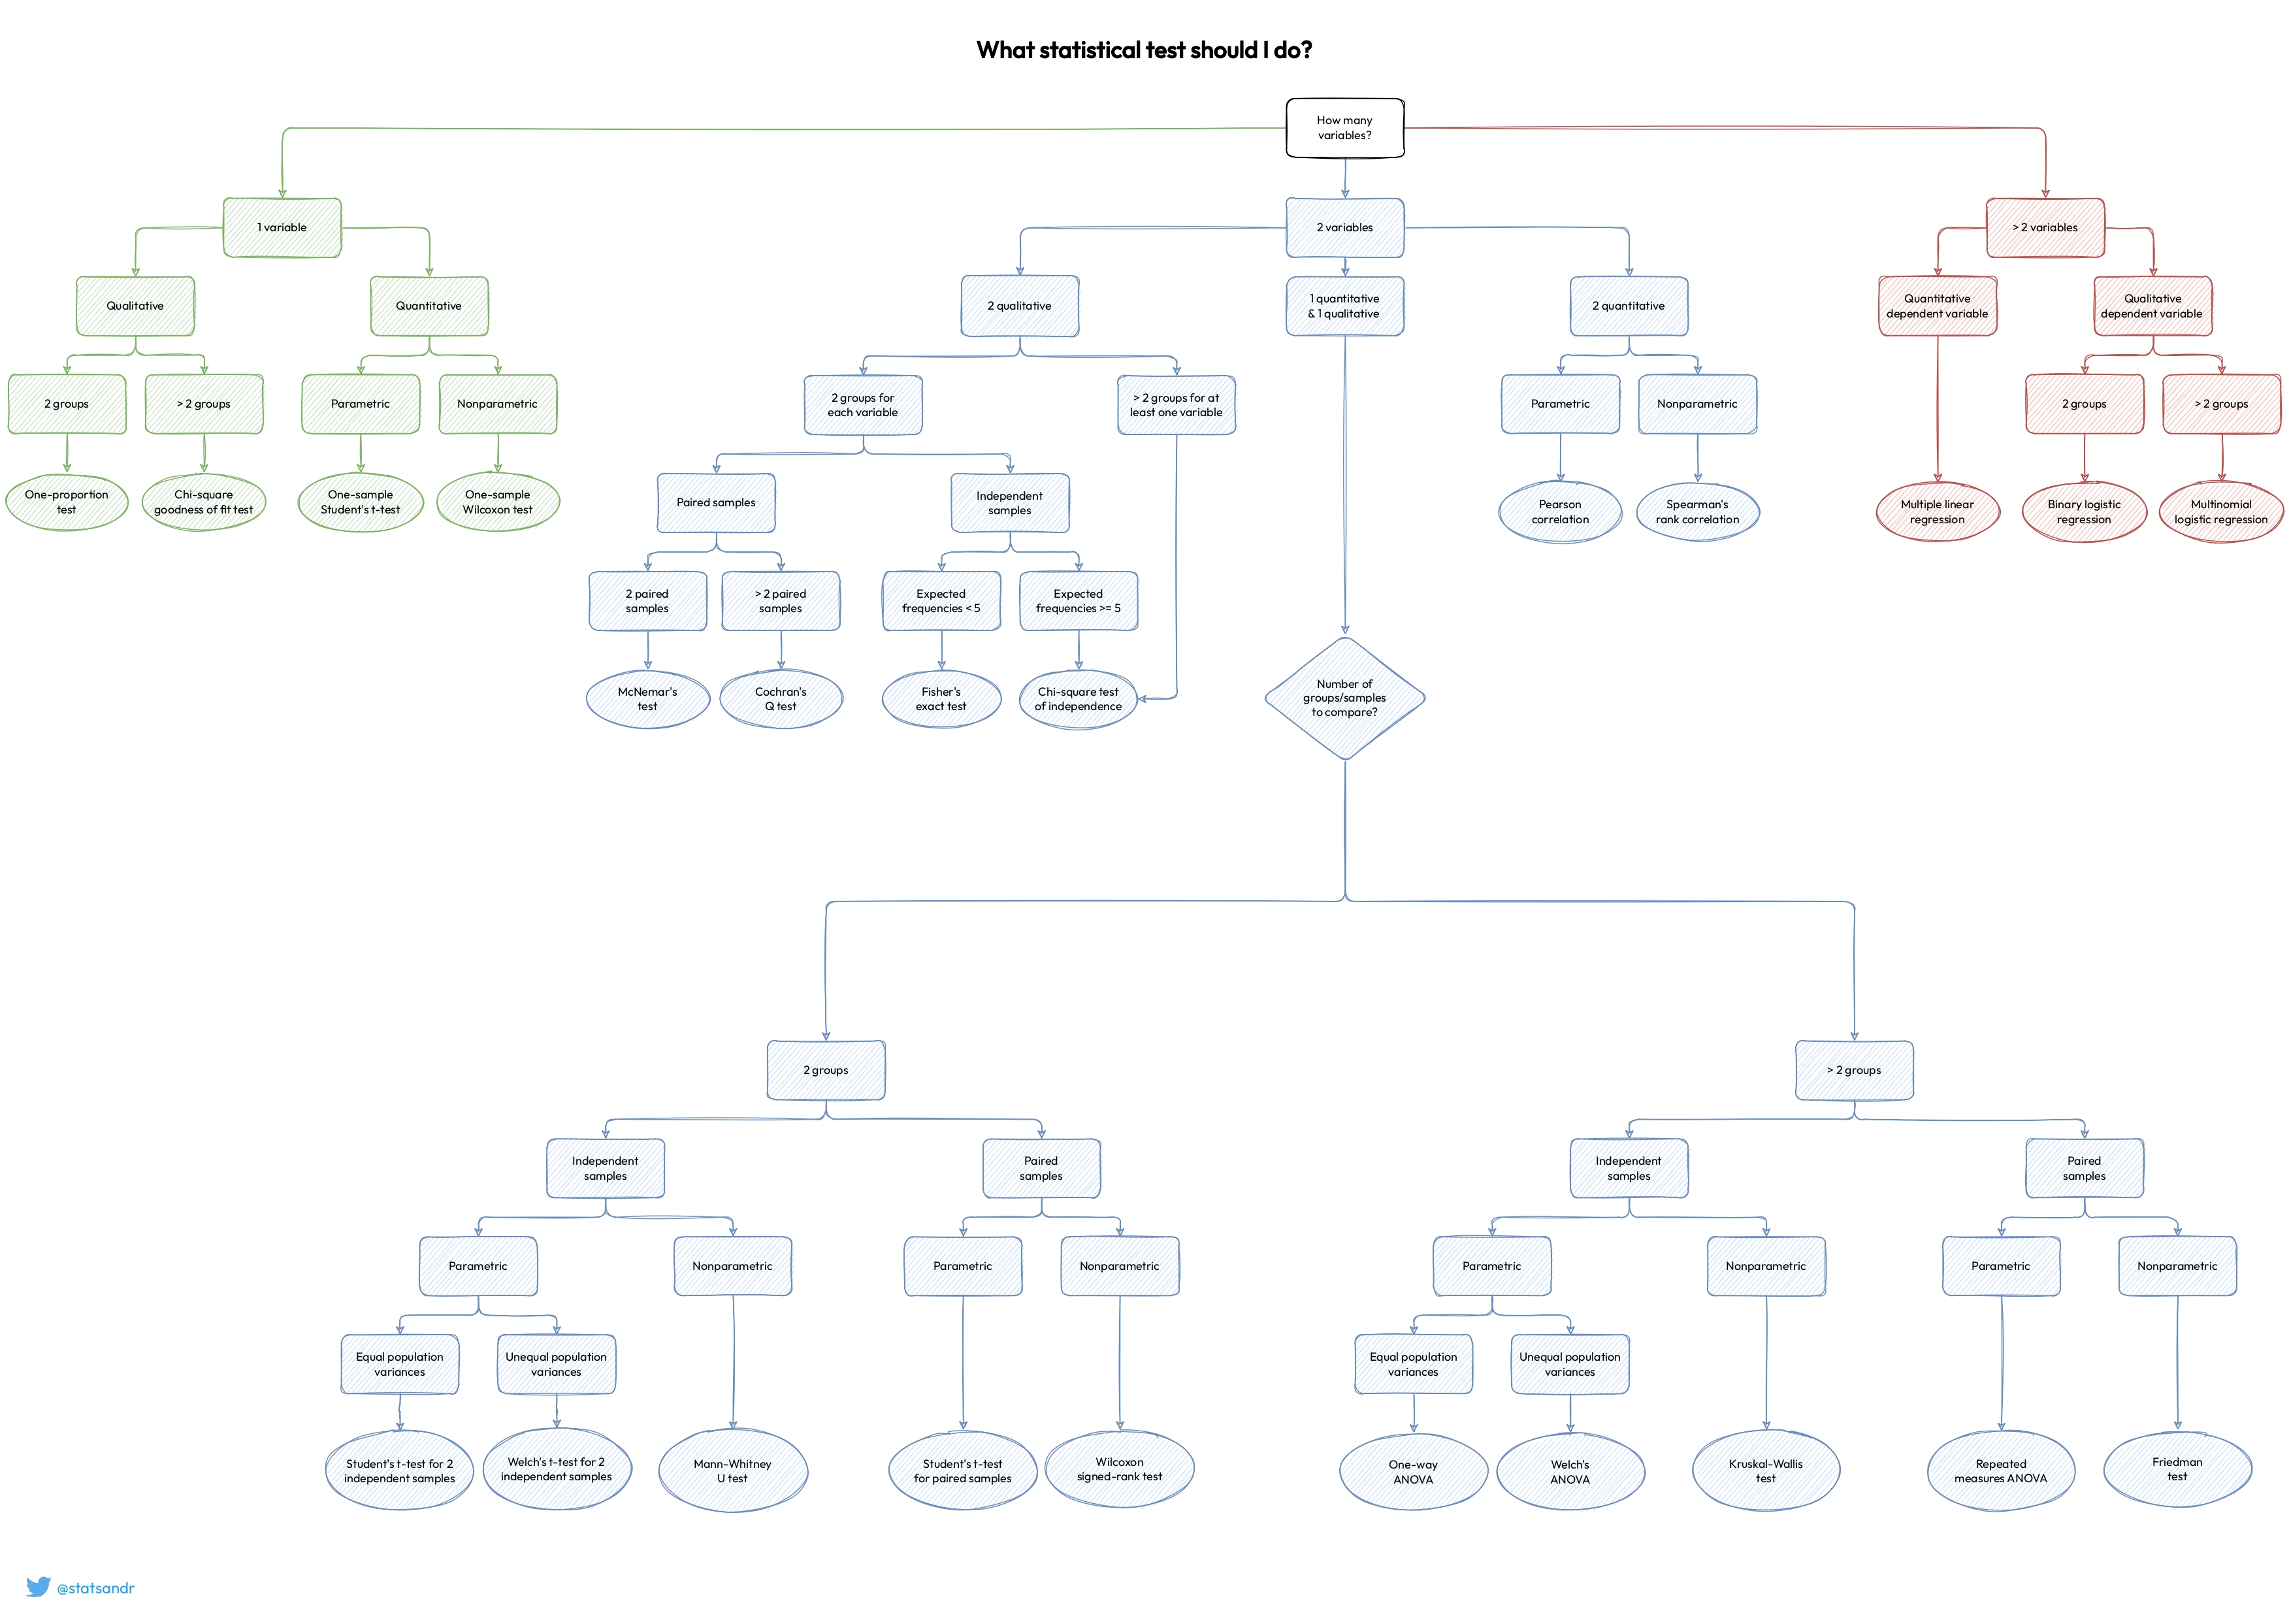